<a href="https://colab.research.google.com/github/muhammedafsalpm/ICT-Academy-of-Kerala/blob/main/Copy_of_Muh_Afsal_P_M_Data_Science_role_at_Tranzmeo_IT_Solutions_Pvt_Ltd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Science role at Tranzmeo IT Solutions Pvt. Ltd**

Platform: Data Science &

---


Question Number : TZ 001

1. Familiarize yourself with the dataset, then write some python code which returns a line
graph of the record high and record low temperatures by day of the year over the period
2005-2014. The area between the record high and record low temperatures for each day
should be shaded.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


temperature_data = pd.read_csv('temperature.csv')
bin_size_data = pd.read_csv('BinSize.csv')


temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])


data_2005_2014 = temperature_data[(temperature_data['Date'].dt.year >= 2005) & (temperature_data['Date'].dt.year <= 2014)].copy()


data_2015 = temperature_data[temperature_data['Date'].dt.year == 2015].copy()


data_2005_2014.loc[:, 'Day_of_Year'] = data_2005_2014['Date'].dt.dayofyear
data_2015.loc[:, 'Day_of_Year'] = data_2015['Date'].dt.dayofyear

record_highs = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby('Day_of_Year')['Data_Value'].max()
record_lows = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby('Day_of_Year')['Data_Value'].min()



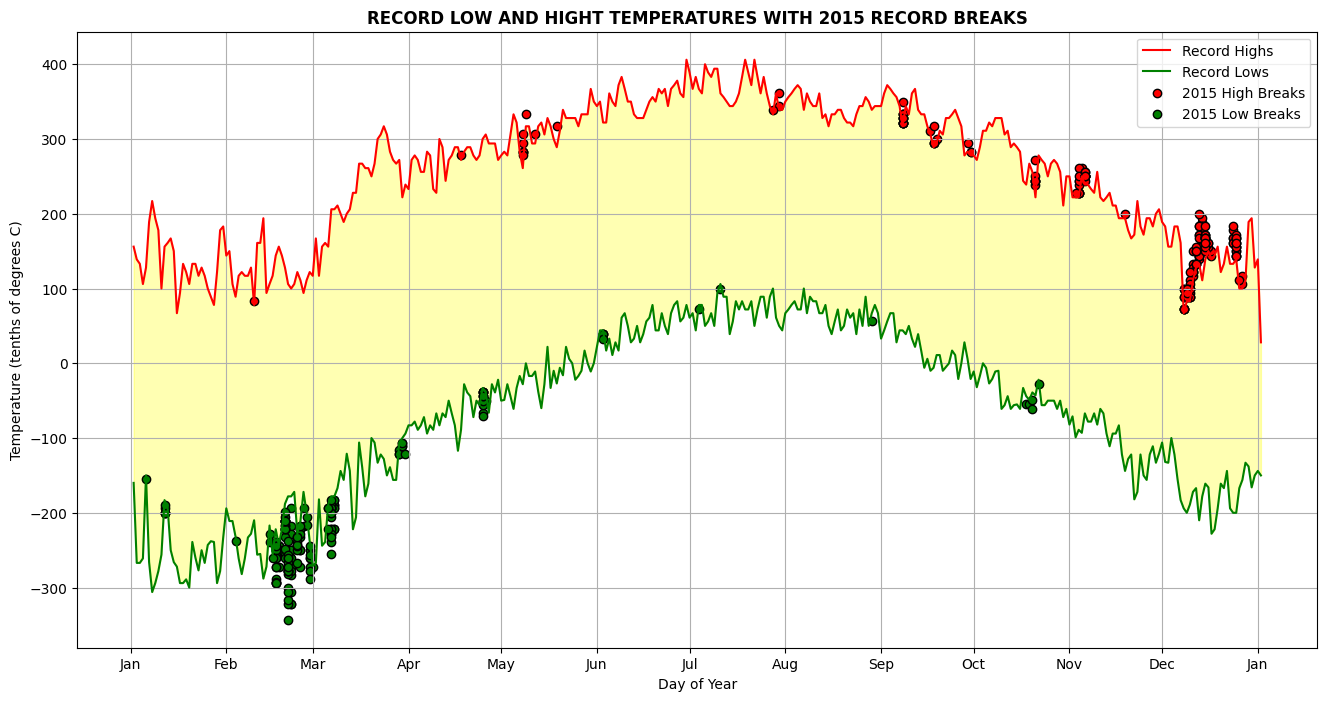

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(record_highs.index, record_highs.values, label='Record Highs', color='red')
plt.plot(record_lows.index, record_lows.values, label='Record Lows', color='green')


plt.fill_between(record_highs.index, record_lows, record_highs, color='yellow', alpha=0.3)

high_breaks = data_2015[data_2015['Element'] == 'TMAX'].merge(record_highs, left_on='Day_of_Year', right_index=True)
low_breaks = data_2015[data_2015['Element'] == 'TMIN'].merge(record_lows, left_on='Day_of_Year', right_index=True)

high_breaks = high_breaks[high_breaks['Data_Value_x'] > high_breaks['Data_Value_y']]
low_breaks = low_breaks[low_breaks['Data_Value_x'] < low_breaks['Data_Value_y']]

plt.scatter(high_breaks['Day_of_Year'], high_breaks['Data_Value_x'], color='red', edgecolor='black', label='2015 High Breaks', marker='o')
plt.scatter(low_breaks['Day_of_Year'], low_breaks['Data_Value_x'], color='green', edgecolor='black', label='2015 Low Breaks', marker='o')

plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('RECORD LOW AND HIGHT TEMPERATURES WITH 2015 RECORD BREAKS', fontweight='bold')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year
record (2005-2014) record high or record low was broken in 2015.

In [ ]:

record_highs = dt_2005_2014[dt_2005_2014['Element'] == 'TMAX'].groupby('Day_of_Year')['Data_Value'].max()
record_lows = dt_2005_2014[dt_2005_2014['Element'] == 'TMIN'].groupby('Day_of_Year')['Data_Value'].min()


high_2015 = dt_2015[dt_2015['Element'] == 'TMAX'].merge(record_highs, left_on='Day_of_Year', right_index=True, suffixes=('_2015', '_2005_2014'))
low_2015 = dt_2015[dt_2015['Element'] == 'TMIN'].merge(record_lows, left_on='Day_of_Year', right_index=True, suffixes=('_2015', '_2005_2014'))

high_breaks = high_2015[high_2015['Data_Value_2015'] > high_2015['Data_Value_2005_2014']]
low_breaks = low_2015[low_2015['Data_Value_2015'] < low_2015['Data_Value_2005_2014']]


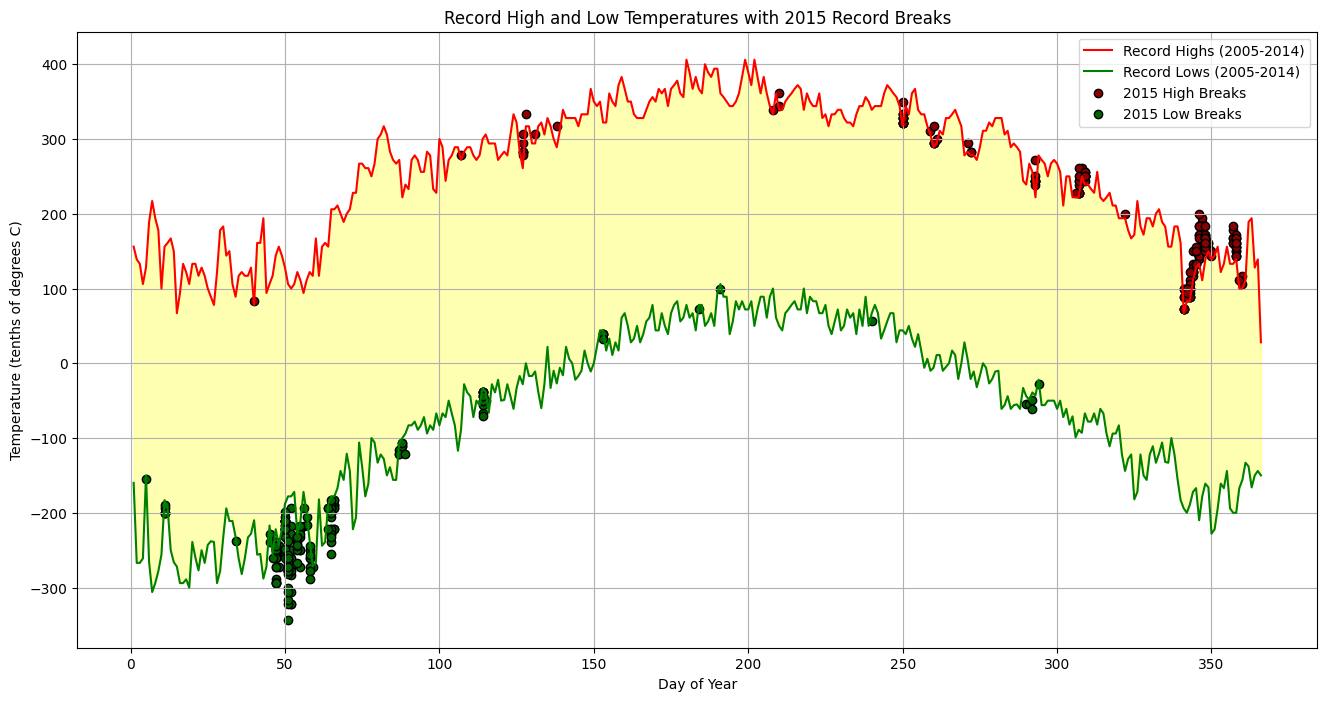

In [ ]:
plt.figure(figsize=(16, 8))


plt.plot(record_highs.index, record_highs.values, label='Record Highs (2005-2014)', color='red')
plt.plot(record_lows.index, record_lows.values, label='Record Lows (2005-2014)', color='green')
plt.fill_between(record_highs.index, record_lows, record_highs, color='yellow', alpha=0.3)


plt.scatter(high_breaks['Day_of_Year'], high_breaks['Data_Value_2015'], color='darkred', edgecolor='black', label='2015 High Breaks', marker='o')
plt.scatter(low_breaks['Day_of_Year'], low_breaks['Data_Value_2015'], color='darkgreen', edgecolor='black', label='2015 Low Breaks', marker='o')


plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('Record High and Low Temperatures with 2015 Record Breaks')
plt.legend()
plt.grid(True)

plt.show()



3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from
the dataset for the purpose of this visualization.  

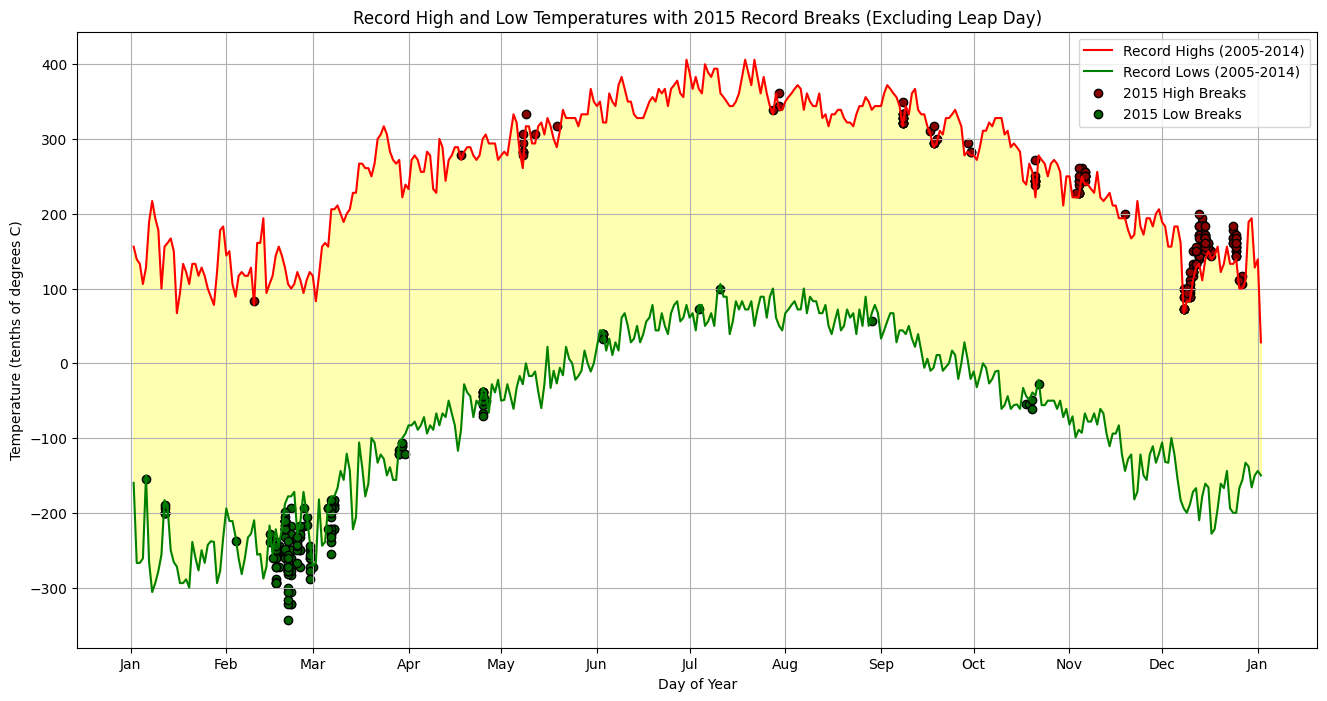

In [ ]:

temperature_data = pd.read_csv('temperature.csv')
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])

data_2005_2014 = temperature_data[(temperature_data['Date'].dt.year >= 2005) & (temperature_data['Date'].dt.year <= 2014)].copy()
data_2015 = temperature_data[temperature_data['Date'].dt.year == 2015].copy()

data_2005_2014['Day_of_Year'] = data_2005_2014['Date'].dt.dayofyear
data_2015['Day_of_Year'] = data_2015['Date'].dt.dayofyear

data_2005_2014 = data_2005_2014[~((data_2005_2014['Date'].dt.month == 2) & (data_2005_2014['Date'].dt.day == 29))]
data_2015 = data_2015[~((data_2015['Date'].dt.month == 2) & (data_2015['Date'].dt.day == 29))]

record_highs = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby('Day_of_Year')['Data_Value'].max()
record_lows = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby('Day_of_Year')['Data_Value'].min()

plt.figure(figsize=(16, 8))

plt.plot(record_highs.index, record_highs.values, label='Record Highs (2005-2014)', color='red')
plt.plot(record_lows.index, record_lows.values, label='Record Lows (2005-2014)', color='green')

plt.fill_between(record_highs.index, record_lows, record_highs, color='yellow', alpha=0.3)

high_breaks = data_2015[data_2015['Element'] == 'TMAX'].merge(record_highs, left_on='Day_of_Year', right_index=True)
low_breaks = data_2015[data_2015['Element'] == 'TMIN'].merge(record_lows, left_on='Day_of_Year', right_index=True)

high_breaks = high_breaks[high_breaks['Data_Value_x'] > high_breaks['Data_Value_y']]
low_breaks = low_breaks[low_breaks['Data_Value_x'] < low_breaks['Data_Value_y']]

plt.scatter(high_breaks['Day_of_Year'], high_breaks['Data_Value_x'], color='darkred', edgecolor='black', label='2015 High Breaks', marker='o')
plt.scatter(low_breaks['Day_of_Year'], low_breaks['Data_Value_x'], color='darkgreen', edgecolor='black', label='2015 Low Breaks', marker='o')

plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('Record High and Low Temperatures with 2015 Record Breaks (Excluding Leap Day)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


4. Consider issues such as legends, labels, and chart junk.  

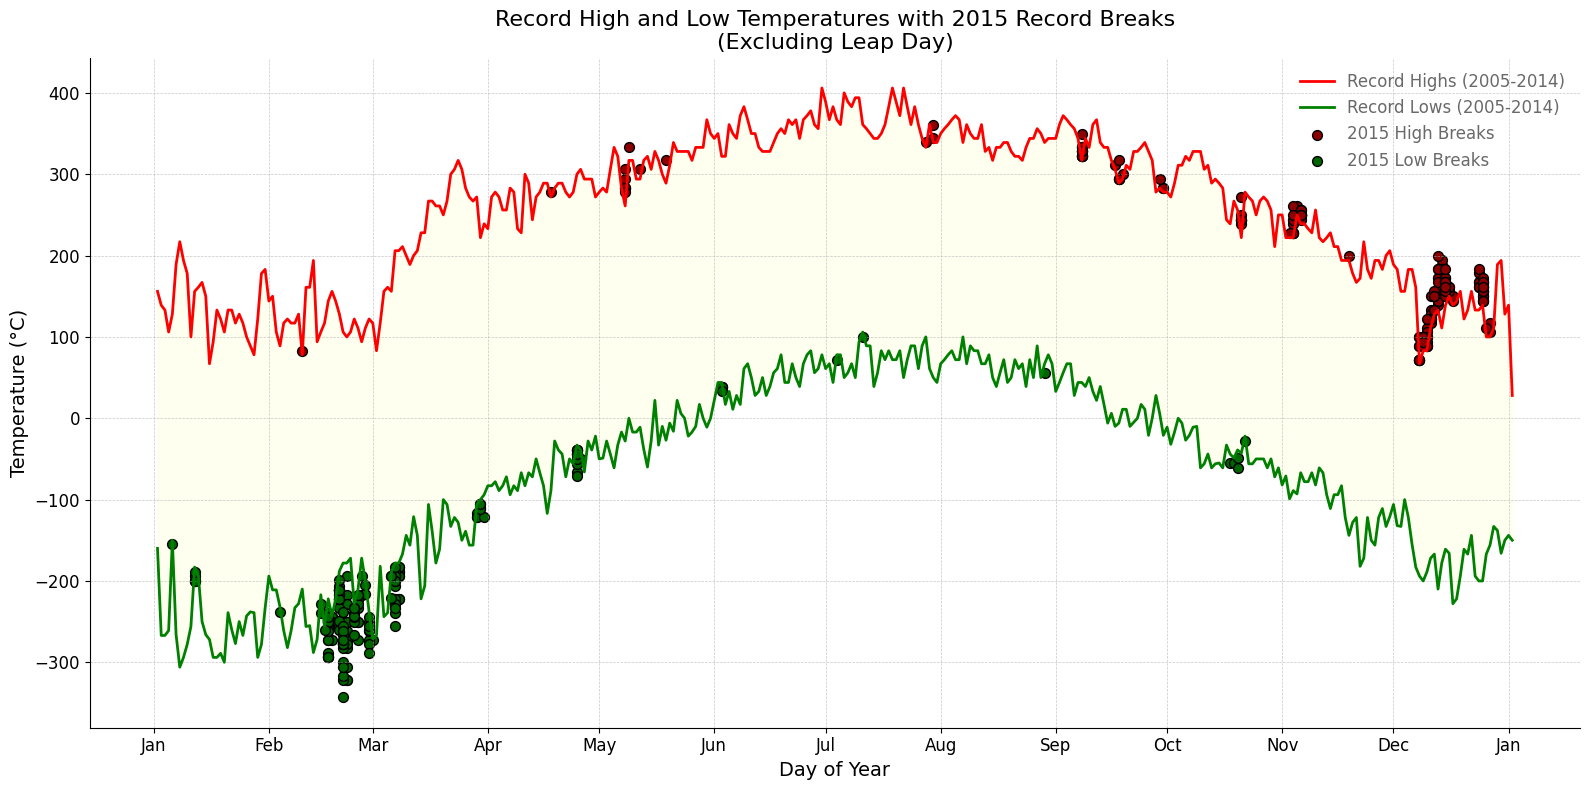

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(record_highs.index, record_highs.values, label='Record Highs (2005-2014)', color='red', linewidth=2)
plt.plot(record_lows.index, record_lows.values, label='Record Lows (2005-2014)', color='green', linewidth=2)

plt.fill_between(record_highs.index, record_lows, record_highs, color='lightyellow', alpha=0.5)

plt.scatter(high_breaks['Day_of_Year'], high_breaks['Data_Value_x'], color='darkred', edgecolor='black', label='2015 High Breaks', marker='o', s=50)
plt.scatter(low_breaks['Day_of_Year'], low_breaks['Data_Value_x'], color='darkgreen', edgecolor='black', label='2015 Low Breaks', marker='o', s=50)

plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.title('Record High and Low Temperatures with 2015 Record Breaks\n(Excluding Leap Day)', fontsize=16)

legend = plt.legend(loc='best', frameon=False, fontsize=12)
for text in legend.get_texts():
    text.set_color('dimgrey')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


5. The data you have been given is near **Ann Arbor, Michigan, United States**, and
visualize on map the stations the data.

In [ ]:
!pip install folium


In [ ]:


ann_arbor_coords = (42.2808, -83.7430)


from geopy.distance import great_circle

def distance_from_ann_arbor(row):
    station_coords = (row['LATITUDE'], row['LONGITUDE'])
    return great_circle(ann_arbor_coords, station_coords).miles

bin_size_data['Distance_to_Ann_Arbor'] = bin_size_data.apply(distance_from_ann_arbor, axis=1)

nearby_stations = bin_size_data[bin_size_data['Distance_to_Ann_Arbor'] <= 50]


In [ ]:
import folium


m = folium.Map(location=ann_arbor_coords, zoom_start=10)


for _, row in nearby_stations.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"Station ID: {row['ID']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

folium.Marker(
    location=ann_arbor_coords,
    popup='Ann Arbor',
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(m)

m


6. Plot Temperature Summary near Ann Arbor,
Michigan, United States (Year 2015).

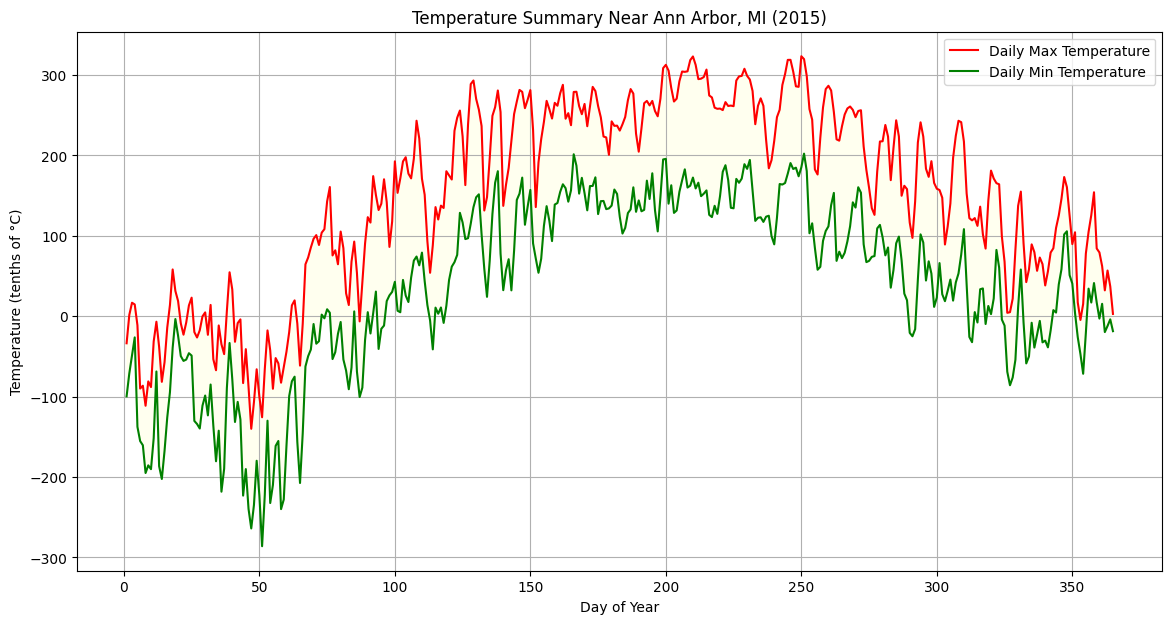

In [ ]:

from geopy.distance import great_circle

temperature_data = pd.read_csv('temperature.csv')
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])

data_2015 = temperature_data[temperature_data['Date'].dt.year == 2015]

bin_size_data = pd.read_csv('BinSize.csv')
ann_arbor_coords = (42.2808, -83.7430)

def distance_from_ann_arbor(row):
    station_coords = (row['LATITUDE'], row['LONGITUDE'])
    return great_circle(ann_arbor_coords, station_coords).miles

bin_size_data['Distance_to_Ann_Arbor'] = bin_size_data.apply(distance_from_ann_arbor, axis=1)
nearby_stations = bin_size_data[bin_size_data['Distance_to_Ann_Arbor'] <= 50]

data_2015_nearby = data_2015[data_2015['ID'].isin(nearby_stations['ID'])].copy()

data_2015_nearby['Day_of_Year'] = data_2015_nearby['Date'].dt.dayofyear

temperature_summary = data_2015_nearby.pivot_table(
    index='Day_of_Year',
    columns='Element',
    values='Data_Value',
    aggfunc='mean'
).reset_index()

temperature_summary.columns = ['Day_of_Year', 'TMAX', 'TMIN']

plt.figure(figsize=(14, 7))

plt.plot(temperature_summary['Day_of_Year'], temperature_summary['TMAX'], label='Daily Max Temperature', color='red')
plt.plot(temperature_summary['Day_of_Year'], temperature_summary['TMIN'], label='Daily Min Temperature', color='green')

plt.fill_between(
    temperature_summary['Day_of_Year'],
    temperature_summary['TMIN'],
    temperature_summary['TMAX'],
    color='lightyellow',
    alpha=0.5
)

plt.title('Temperature Summary Near Ann Arbor, MI (2015)')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of °C)')
plt.legend()
plt.grid(True)
plt.show()
